In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs/val.csv
/kaggle/input/cats-and-dogs/train.csv
/kaggle/input/cats-and-dogs/val/classname.txt
/kaggle/input/cats-and-dogs/val/dog/havanese_144_jpg.rf.d3e2e8cb9a7801e61894e372c4f1e1bb.jpg
/kaggle/input/cats-and-dogs/val/dog/american_pit_bull_terrier_135_jpg.rf.f23ba7a8a1017fc71e62dcdeb3af9fa9.jpg
/kaggle/input/cats-and-dogs/val/dog/great_pyrenees_190_jpg.rf.ebd07e7aae6a416425fa1f3c89872b61.jpg
/kaggle/input/cats-and-dogs/val/dog/great_pyrenees_144_jpg.rf.d416d150a51cd8c6ae1489957c49e01b.jpg
/kaggle/input/cats-and-dogs/val/dog/chihuahua_17_jpg.rf.d97aa2c7e61de5128686d82b87c95215.jpg
/kaggle/input/cats-and-dogs/val/dog/english_cocker_spaniel_17_jpg.rf.f22312874dde3803847df16bcfe12f83.jpg
/kaggle/input/cats-and-dogs/val/dog/american_bulldog_148_jpg.rf.f0a7b86489589aa05534a6f8cb0fe70a.jpg
/kaggle/input/cats-and-dogs/val/dog/english_cocker_spaniel_121_jpg.rf.db065f7b515f83644b2fcb7525073d0b.jpg
/kaggle/input/cats-and-dogs/val/dog/pomeranian_134_jpg.rf.fb1b528eaddde0

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

2026-01-21 06:04:53.199355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768975493.421484      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768975493.486158      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768975494.026056      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768975494.026110      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768975494.026112      17 computation_placer.cc:177] computation placer alr

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

2026-01-21 06:05:09.915803: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
conv_base.trainable = False

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cats-and-dogs/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cats-and-dogs/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 275 files belonging to 2 classes.
Found 70 files belonging to 2 classes.


In [9]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds ,epochs=10,validation_data= val_ds)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5940 - loss: 1.8042 - val_accuracy: 0.4714 - val_loss: 0.9251
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.6799 - loss: 0.6090 - val_accuracy: 0.8000 - val_loss: 0.4192
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9069 - loss: 0.2502 - val_accuracy: 0.8571 - val_loss: 0.3847
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9447 - loss: 0.1541 - val_accuracy: 0.9000 - val_loss: 0.2998
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.9799 - loss: 0.1152 - val_accuracy: 0.8571 - val_loss: 0.3699
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9964 - loss: 0.0717 - val_accuracy: 0.8857 - val_loss: 0.3301
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9979 - loss: 0.0471 - val_accuracy: 0.8857 - val_loss: 0.2951
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 0.8714 - val_loss: 0.3652
Epoch 9/

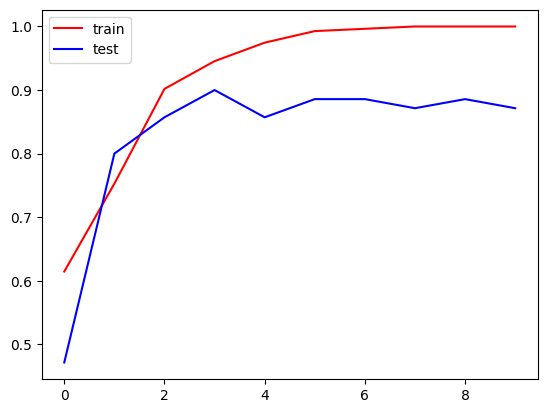

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

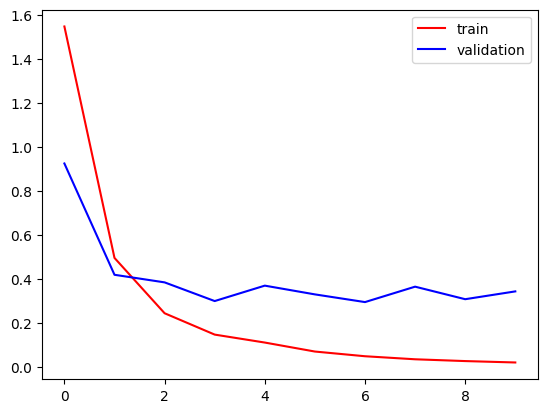

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# *With augmentation*

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

In [15]:
batch_size=32

train_datagen = ImageDataGenerator(
    rescale =1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cats-and-dogs/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cats-and-dogs/val',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode = 'binary'
)

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9069 - loss: 0.2311 - val_accuracy: 0.8143 - val_loss: 0.6181
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8960 - loss: 0.2273 - val_accuracy: 0.8571 - val_loss: 0.3265
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9733 - loss: 0.0956 - val_accuracy: 0.8714 - val_loss: 0.3135
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9597 - loss: 0.0920 - val_accuracy: 0.8571 - val_loss: 0.3503
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9790 - loss: 0.0695 - val_accuracy: 0.8429 - val_loss: 0.4204
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9857 - loss: 0.0633 - val_accuracy: 0.8429 - val_loss: 0.4386
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9912 - loss: 0.0413 - val_accuracy: 0.8571 - val_loss: 0.3658
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9931 - loss: 0.0466 - val_accuracy: 0.8429 - val_loss: 0.3339
Epoch 9/

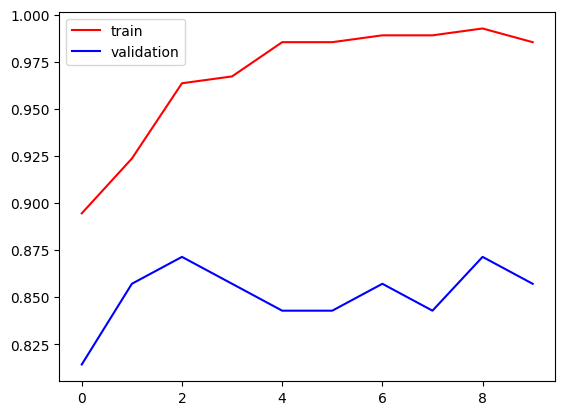

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

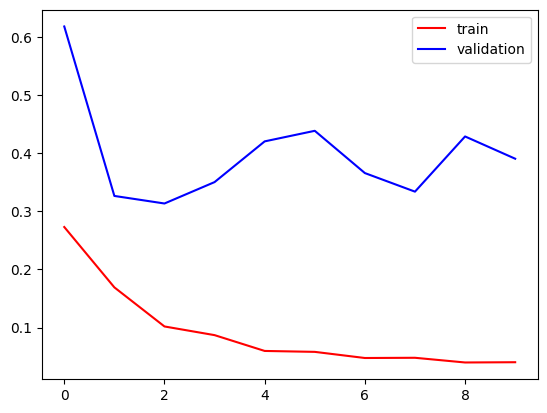

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()